                                            SPEECH RECOGNITION

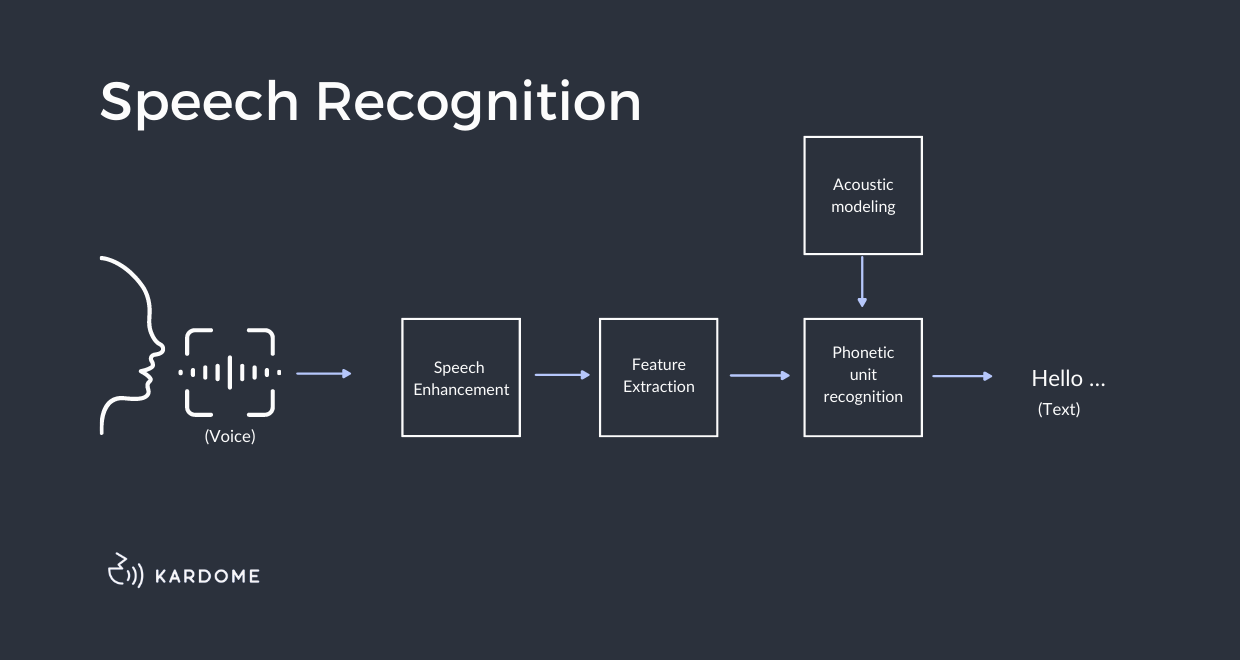

What is Speech Recognition:

Speech recognition, also known as automatic speech recognition (ASR) or voice recognition, is a technology that converts spoken language into written text. 

Here are the key steps in a short summary:

Acquisition of Audio Input: Capture audio signals using a microphone or other recording device.

Preprocessing: Clean and preprocess the audio data to enhance signal quality, removing noise or distortions.

Feature Extraction: Extract relevant features from the audio signal, such as spectral features or Mel-frequency cepstral coefficients (MFCCs).

Model Training: Train a speech recognition model using machine learning algorithms, often deep neural networks, on a labeled dataset containing pairs of audio samples and their corresponding transcriptions.

Decoding: Apply the trained model to decode or transcribe the input audio into text.

Post-processing: Refine the transcription results, applying techniques such as language modeling or context-aware algorithms.

Output: Obtain the final transcribed text as the output of the speech recognition system.

Speech recognition is used in various applications, including voice assistants, transcription services, and hands-free operation of devices.

Speaker recognition and speech recognition are two distinct but related fields within the broader domain of audio signal processing and analysis. Here are the key differences between them:

1. **Objective:**
   - **Speaker Recognition:** The primary goal of speaker recognition is to identify or verify the identity of a speaker based on their unique vocal characteristics, often referred to as speaker "voiceprints" or "biometric signatures." It is a form of biometric authentication.
   - **Speech Recognition:** The main objective of speech recognition is to convert spoken language into text or other forms of commands. Speech recognition systems analyze audio signals to understand and transcribe the spoken words.

2. **Focus:**
   - **Speaker Recognition:** Focuses on the unique characteristics of an individual's voice, such as pitch, tone, accent, and speech patterns, to establish the speaker's identity.
   - **Speech Recognition:** Focuses on understanding and interpreting the linguistic content of spoken words, regardless of the speaker. It involves converting spoken language into a textual representation.

3. **Applications:**
   - **Speaker Recognition:** Commonly used in security systems, access control, and authentication applications where the identity of the speaker needs to be verified.
   - **Speech Recognition:** Applied in various fields, including voice-activated assistants, transcription services, voice commands in smart devices, and interactive voice response (IVR) systems.

4. **Challenges:**
   - **Speaker Recognition:** Faces challenges such as variations in voice due to health, emotional state, or environmental conditions. It also needs to account for potential attempts at voice impersonation.
   - **Speech Recognition:** Challenges include dealing with variations in accents, background noise, and context-dependent language understanding. It requires sophisticated natural language processing (NLP) techniques.

5. **Techniques:**
   - **Speaker Recognition:** Uses techniques such as speaker verification (confirming identity) and speaker identification (naming the speaker) based on feature extraction and pattern matching.
   - **Speech Recognition:** Utilizes techniques such as Hidden Markov Models (HMMs), Gaussian Mixture Models(GMMS), deep neural networks (DNNs), and recurrent neural networks (RNNs) for acoustic modeling and language modeling.

6. **Output:**
   - **Speaker Recognition:** Outputs the identity or verification result of the speaker.
   - **Speech Recognition:** Outputs the transcribed text or recognized spoken commands.

While speaker and speech recognition have distinct objectives, they can complement each other in applications where both speaker identity and spoken content need to be considered, such as in security systems with voice commands.

## INTRODUCTION

WHAT WE WILL COVER IN THIS PROJECT:

1) Speech Recognition-speech to text, text to speech and translation:

    a) Capture spoken audio and display the transcription(predicted text)
    
    b) Enrich audio by volume and background nosie adjustments
    
    c) Compare transcription to actual text.Utilize WER score.
    
    d) Translate the transcribed text into another language(French and Turkish).
    
    e) Listen to the audio of translated text
    
2) Speech Recognition-prediction of gender from audio files:

    a) Visualize audio files for key indicators for gender recognition.
    
    b) Extract key features from audio files to input into model training.
    
    c) Train and evaluate a neural network model to predict the gender for audio files.
    
    
We are provided with many short audio files to be used for this project. For our translation section, we will only use handful of these files to showcase and for gender prediction, we will be using a subset(10,000) of the training data that is provided. A separate csv file is provided that has the audio file names, actual spoken text, gender, age of speaker and few other datapoints to assist with the project.

## Part 1 - Speech to text, text to speech and translation

Importing libraries and the csv file

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Specify the file path
file_path = '/kaggle/input/common-voice/cv-valid-train.csv'

# Read the CSV file into a DataFrame
dftrain = pd.read_csv(file_path)
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195776 entries, 0 to 195775
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   filename    195776 non-null  object 
 1   text        195776 non-null  object 
 2   up_votes    195776 non-null  int64  
 3   down_votes  195776 non-null  int64  
 4   age         73768 non-null   object 
 5   gender      74059 non-null   object 
 6   accent      64711 non-null   object 
 7   duration    0 non-null       float64
dtypes: float64(1), int64(2), object(5)
memory usage: 11.9+ MB


There are many blanks on few of the columns, for predicting gender, we will only use the rows that have the data.

In [3]:
# Set the option to display maximum column width
pd.set_option('display.max_colwidth', None)
dftrain.head()

filename  \
0  cv-valid-train/sample-000000.mp3   
1  cv-valid-train/sample-000001.mp3   
2  cv-valid-train/sample-000002.mp3   
3  cv-valid-train/sample-000003.mp3   
4  cv-valid-train/sample-000004.mp3   

                                                                                  text  \
0                       learn to recognize omens and follow them the old king had said   
1                                           everything in the universe evolved he said   
2                you came so that you could learn about your dreams said the old woman   
3              so now i fear nothing because it was those omens that brought you to me   
4  if you start your emails with greetings let me be the first to welcome you to earth   

   up_votes  down_votes  age gender accent  duration  
0         1           0  NaN    NaN    NaN       NaN  
1         1           0  NaN    NaN    NaN       NaN  
2         1           0  NaN    NaN    NaN       NaN  
3         1           0  NaN    NaN    NaN       NaN  
4         3           2  NaN    NaN    NaN       NaN

Lets listen to the first 10 audio files in our training folder. We obserbe that some file have very low volume along with background noise which will be challenging to perfrom speech to text tasks. Click play to play the audio.

In [4]:
from IPython.display import display, Audio
import os
from pydub import AudioSegment

# Function to play audio file
def play_audio(audio_path):
    display(Audio(filename=audio_path))

# Specify the folder path containing MP3 files
folder_path = '/kaggle/input/common-voice/cv-valid-train/cv-valid-train'

# Get the list of all files in the folder and sort them
all_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.mp3')])

# Get the total file count
total_files = len(all_files)
print(f'Total number of MP3 files in the folder: {total_files}')

# Play the first two audio files
for i in range(min(10, len(all_files))):
    file_path = os.path.join(folder_path, all_files[i])
    audio = AudioSegment.from_mp3(file_path)
    
    print(f'Playing file: {all_files[i]}')
    play_audio(file_path)

Total number of MP3 files in the folder: 195776
Playing file: sample-000000.mp3


Playing file: sample-000001.mp3


Playing file: sample-000002.mp3


Playing file: sample-000003.mp3


Playing file: sample-000004.mp3


Playing file: sample-000005.mp3


Playing file: sample-000006.mp3


Playing file: sample-000007.mp3


Playing file: sample-000008.mp3


Playing file: sample-000009.mp3


In [5]:
!pip install SpeechRecognition pydub

  Obtaining dependency information for SpeechRecognition from https://files.pythonhosted.org/packages/e6/28/b5e6e769002e46a5edef16871884721d4b68da31dbd4509db6ea50f8b224/SpeechRecognition-3.10.4-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 41.5 MB/s eta 0:00:00:00:0100:01


Performing speech to text on first 10 audio files. As a baseline, we see that SpeechRecognition library does a decent job. We will try to improve by applying extra adjustments on audio files.

In [6]:
import os
import speech_recognition as sr
from pydub import AudioSegment

# Set the path to the audio files
audio_folder = '/kaggle/input/common-voice/cv-valid-train/cv-valid-train'

# Get a list of all audio files in the folder
audio_files = [file for file in os.listdir(audio_folder) if file.endswith('.mp3')]

# Sort the audio files
audio_files.sort()

# Take the first 10 audio files
selected_audio_files = audio_files[:10]

# Initialize the recognizer
recognizer = sr.Recognizer()

# Process each selected audio file
for audio_file in selected_audio_files:
    # Load the audio file
    audio_path = os.path.join(audio_folder, audio_file)
    audio = AudioSegment.from_mp3(audio_path)

    # Convert the audio to WAV format (required by SpeechRecognition)
    audio.export("temp.wav", format="wav")

    # Recognize speech using Google Web Speech API
    with sr.AudioFile("temp.wav") as source:
        audio_data = recognizer.record(source)
        try:
            # Perform speech recognition
            text = recognizer.recognize_google(audio_data)
            print(f"Audio File: {audio_file}\nTranscription: {text}\n")
        except sr.UnknownValueError:
            print(f"Audio File: {audio_file}\nTranscription not recognized\n")
        except sr.RequestError as e:
            print(f"Audio File: {audio_file}\nError with the speech recognition service; {e}\n")

# Clean up the temporary WAV file
os.remove("temp.wav")

Audio File: sample-000000.mp3
Transcription: learn to recognize Omens and follow them the Old King

Audio File: sample-000001.mp3
Transcription: everything in the universe evolved he said

Audio File: sample-000002.mp3
Transcription: you came so that you could learn about your dreams said the older woman

Audio File: sample-000003.mp3
Transcription: so now I feel nothing because it was those moments that brought you to me

Audio File: sample-000004.mp3
Transcription: if you start your emails with greetings let me be the first to welcome you to Earth

Audio File: sample-000005.mp3
Transcription: a Shepherd may like to travel but he should never forget about his sheep

Audio File: sample-000006.mp3
Transcription: Nightfall and then assortment of fighting men and Merchants entered and exited the tent

Audio File: sample-000007.mp3
Transcription: I heard a faint movement under my feet

Audio File: sample-000008.mp3
Transcription: put Jackie right on the staff

Audio File: sample-000009.mp3

## Data Clean up - Volume and Background Adjustments

We are now trying to adjust the volume of all files and reduce background noise where applicable in order to improve our recognition quality. Sound file adjustment is a complicated process and in some cases it can reduce the actual length of the files, when that happens we may lose some of the audio when performing speech to text so we are also padding all files after the adjustments by 2 seconds. 

Parameters used in noise reduction function:

silence_threshold: This parameter represents the level below which a segment of the audio is considered as silence. Audio portions with levels below this threshold might be treated as silent and potentially removed.

keep_silence: This parameter represents the duration of silence to keep. If there are silent portions in the audio below the silence_threshold, they might be removed unless they are longer than the duration specified by keep_silence.

In [7]:
import os
from pydub import AudioSegment, silence
from concurrent.futures import ThreadPoolExecutor
from pydub.playback import play

# Function to adjust volume and remove background noise
def process_audio(file_path, reference_audio):
    # Load original audio
    original_audio = AudioSegment.from_mp3(file_path)
    
    # Adjust volume
    adjusted_audio = original_audio.apply_gain(reference_audio.dBFS - original_audio.dBFS)
    
    # Remove background noise
    adjusted_audio = remove_background_noise(adjusted_audio)
    
    # Trim or pad to match the length of the original audio with an extra 2 seconds
    adjusted_audio = match_audio_length(original_audio, adjusted_audio, extra_padding=2000)
    
    return adjusted_audio

# Function to remove background noise
def remove_background_noise(audio, silence_threshold=-30, keep_silence=100):
    # Split audio on silence and filter out silent chunks
    chunks = silence.split_on_silence(audio, silence_thresh=silence_threshold, keep_silence=keep_silence)
    filtered_audio = AudioSegment.silent()
    for chunk in chunks:
        filtered_audio += chunk

    return filtered_audio

# Function to match the length of two audio segments
def match_audio_length(original_audio, adjusted_audio, extra_padding=0):
    # Calculate the target length with extra padding
    target_length = len(original_audio) + extra_padding

    # Trim or pad to match the target length
    if len(adjusted_audio) < target_length:
        adjusted_audio = adjusted_audio + AudioSegment.silent(duration=target_length - len(adjusted_audio))
    elif len(adjusted_audio) > target_length:
        adjusted_audio = adjusted_audio[:target_length]

    return adjusted_audio

# Specify the folder path containing MP3 files
folder_path = '/kaggle/input/common-voice/cv-valid-train/cv-valid-train'

# Specify the reference file for volume adjustment
reference_file = 'sample-000000.mp3'
reference_file_path = os.path.join(folder_path, reference_file)
reference_audio = AudioSegment.from_mp3(reference_file_path)

# Process only the first 10 audio files
audio_files = [file for file in os.listdir(folder_path) if file.endswith('.mp3')]
audio_files.sort()
selected_audio_files = audio_files[:10]

# Counter for tracking the number of files being processed
files_processed_counter = 0

# Process audio files (adjust volume and remove background noise) using parallelization
with ThreadPoolExecutor() as executor:
    # List of futures representing the ongoing audio processing tasks
    futures_process = []

    for file_name in selected_audio_files:
        file_path = os.path.join(folder_path, file_name)

        # Process audio (adjust volume and remove background noise)
        futures_process.append(executor.submit(process_audio, file_path, reference_audio))
        files_processed_counter += 1
        print(f'\rProcessing audio: {files_processed_counter} files processed', end='', flush=True)

    # Wait for all audio processing tasks to complete and retrieve results
    processed_audios = [future.result() for future in futures_process]

# Print the names of the processed audio files
print("\nNames of processed audio files:")
for i, file_name in enumerate(selected_audio_files):
    print(f"{i + 1}. {file_name}")


Processing audio: 10 files processed
Names of processed audio files:
1. sample-000000.mp3
2. sample-000001.mp3
3. sample-000002.mp3
4. sample-000003.mp3
5. sample-000004.mp3
6. sample-000005.mp3
7. sample-000006.mp3
8. sample-000007.mp3
9. sample-000008.mp3
10. sample-000009.mp3


Play the adjusted files, these are the same 10 files we listened earlier but now adjusted for volume and background noise. We observe that quality is much improved.

In [8]:
from IPython.display import Audio, display

# Specify the folder path to save the processed audio files
output_folder = '/kaggle/working/'

# Save the processed audio files with the same names
for i, audio in enumerate(processed_audios):
    file_name, file_extension = os.path.splitext(selected_audio_files[i])
    output_file_path = os.path.join(output_folder, f'{file_name}.mp3')
    audio.export(output_file_path, format='mp3')

    print(f'Saved processed audio: {output_file_path}')

    # Play the processed audio
    print(f'Playing Adjusted Audio: {selected_audio_files[i]}')
    display(Audio(output_file_path))

Saved processed audio: /kaggle/working/sample-000000.mp3
Playing Adjusted Audio: sample-000000.mp3


Saved processed audio: /kaggle/working/sample-000001.mp3
Playing Adjusted Audio: sample-000001.mp3


Saved processed audio: /kaggle/working/sample-000002.mp3
Playing Adjusted Audio: sample-000002.mp3


Saved processed audio: /kaggle/working/sample-000003.mp3
Playing Adjusted Audio: sample-000003.mp3


Saved processed audio: /kaggle/working/sample-000004.mp3
Playing Adjusted Audio: sample-000004.mp3


Saved processed audio: /kaggle/working/sample-000005.mp3
Playing Adjusted Audio: sample-000005.mp3


Saved processed audio: /kaggle/working/sample-000006.mp3
Playing Adjusted Audio: sample-000006.mp3


Saved processed audio: /kaggle/working/sample-000007.mp3
Playing Adjusted Audio: sample-000007.mp3


Saved processed audio: /kaggle/working/sample-000008.mp3
Playing Adjusted Audio: sample-000008.mp3


Saved processed audio: /kaggle/working/sample-000009.mp3
Playing Adjusted Audio: sample-000009.mp3


## COMPARISON

We now compare the transcribed(predicted) text from our SpeechRecognition library vs the actual text that is already available on the provided csv file. We use WER scoring to evaluate the predcited text vs the actual text.

WER, or Word Error Rate, is a metric commonly used to evaluate the performance of automatic speech recognition (ASR) systems, machine translation systems, and other systems involving the conversion of spoken or written language. WER is a measure of the percentage of words that are incorrectly predicted or transcribed by the system. Lower the WER score, the better the speech to text task.

We observe that our Speech to Text performance is pretty good based on below.

In [9]:
!pip install SpeechRecognition pydub python-Levenshtein

In [10]:
import os
import pandas as pd
import speech_recognition as sr
import Levenshtein as lev
from pydub import AudioSegment
from pydub.effects import normalize

# Set the path to the audio files
csv_path = '/kaggle/input/common-voice/cv-valid-train.csv'

# Read the CSV file
df = pd.read_csv(csv_path)

# Use the processed audio files generated in the previous code
#processed_audios = [AudioSegment.from_mp3(file) for file in os.listdir('/kaggle/working') if file.startswith('processed_audio')]

# Take the first 10 processed audio files
selected_processed_audios = processed_audios[:10]

# Initialize the recognizer
recognizer = sr.Recognizer()

for i, audio in enumerate(selected_processed_audios):
    # Apply volume adjustment
    audio = normalize(audio)

    # Export the processed audio to a temporary WAV file
    audio.export("temp.wav", format="wav")

    # Retrieve actual text from the CSV based on filename
    filename_from_text = f'sample-{i:06d}.mp3'
    actual_text = df[df['filename'].str.split('/').str[-1] == filename_from_text]['text'].values


    if len(actual_text) > 0:
        actual_text = actual_text[0]

        # Recognize speech using Google Web Speech API
        with sr.AudioFile("temp.wav") as source:
            audio_data = recognizer.record(source)
            try:
                # Perform speech recognition
                text = recognizer.recognize_google(audio_data)
                # Calculate WER score
                wer_score = lev.distance(text.split(), actual_text.split()) / len(actual_text.split())

                # Print results
                print(f"Filename: {filename_from_text}")
                print(f"Predicted Text: {text}")
                print(f"Actual Text: {actual_text}")
                print(f"WER Score: {wer_score}\n")
            except sr.UnknownValueError:
                print(f"Audio File: {filename_from_text}\nTranscription not recognized\n")
            except sr.RequestError as e:
                print(f"Audio File: {filename_from_text}\nError with the speech recognition service; {e}\n")
    else:
        print(f"Actual text not found in CSV file for {filename_from_text}\n")

# Clean up the temporary WAV file
os.remove("temp.wav")


Filename: sample-000000.mp3
Predicted Text: learn to recognize Omens and follow them the Old King had said
Actual Text: learn to recognize omens and follow them the old king had said
WER Score: 0.25

Filename: sample-000001.mp3
Predicted Text: everything in the universe evolved he said
Actual Text: everything in the universe evolved he said
WER Score: 0.0

Filename: sample-000002.mp3
Predicted Text: you came so that you could learn about your dreams said the old
Actual Text: you came so that you could learn about your dreams said the old woman
WER Score: 0.07142857142857142

Filename: sample-000003.mp3
Predicted Text: so now I feel nothing because it was those moments that brought you to me
Actual Text: so now i fear nothing because it was those omens that brought you to me
WER Score: 0.2

Filename: sample-000004.mp3
Predicted Text: if you start your emails with greetings let me be the first to welcome you to Earth
Actual Text: if you start your emails with greetings let me be the firs

## TRANSLATION

We will now attempt to translate the transcribed text into two other laguages and will view the transcribed text and listen to the audio in the translated language.

In [11]:
!pip install gtts
!pip install translate

  Obtaining dependency information for gtts from https://files.pythonhosted.org/packages/59/a8/e3434904445eacf03b857ac001755d8ffac49b4f3339d63592b4eda009dc/gTTS-2.5.1-py3-none-any.whl.metadata
  Obtaining dependency information for translate from https://files.pythonhosted.org/packages/e1/54/df0d3e62636f291d716caa44c5c9590af8e6f225c59d7874051da6428c06/translate-3.6.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for libretranslatepy==2.1.1 from https://files.pythonhosted.org/packages/24/54/044ecbf4eeba3f3feee70d496f34f397dc20714cdb80dfa8bc01e7409f88/libretranslatepy-2.1.1-py3-none-any.whl.metadata


## Translation from English to Turkish

We will be using translate and gtts libraries to perfrom the translation and text to speech tasks. 

Translate library:

This library provides a simple interface to interact with various translation services, allowing you to translate text from one language to another. It acts as a wrapper around online translation services such as Google Translate, Microsoft Translator, etc.

gtts library:

This library, short for "Google Text-to-Speech," allows you to convert text into speech using Google's Text-to-Speech API. It generates an audio file (typically in MP3 format) from the given text.

Click on Audio files below to listen to the Turkish translation

In [12]:
from IPython.display import Audio, display
import os
from translate import Translator
from gtts import gTTS

# Iterate over the results
for i, audio in enumerate(selected_processed_audios):
    # Apply volume adjustment
    audio = normalize(audio)

    # Export the processed audio to a temporary WAV file
    audio.export("temp.wav", format="wav")

    # Retrieve predicted text
    with sr.AudioFile("temp.wav") as source:
        audio_data = recognizer.record(source)
        try:
            # Perform speech recognition
            predicted_text = recognizer.recognize_google(audio_data)

            # Translate predicted text to Turkish
            translator = Translator(to_lang="tr")
            translated_text = translator.translate(predicted_text)

            # Print results
            print(f"Filename: {filename_from_text}")
            print(f"Predicted Text (English): {predicted_text}")
            print(f"Predicted Text (Turkish): {translated_text}")

            # Save translated audio
            tts = gTTS(translated_text, lang='tr')
            translated_audio_path = f"translated_audio_{i}.mp3"
            tts.save(translated_audio_path)

            # Play the translated audio
            display(Audio(translated_audio_path))

        except sr.UnknownValueError:
            print(f"Audio File: {filename_from_text}\nTranscription not recognized\n")
        except sr.RequestError as e:
            print(f"Audio File: {filename_from_text}\nError with the speech recognition service; {e}\n")

# Clean up the temporary WAV file
os.remove("temp.wav")


Filename: sample-000009.mp3
Predicted Text (English): learn to recognize Omens and follow them the Old King had said
Predicted Text (Turkish): kehanetleri tanımayı ve onları takip etmeyi öğren Yaşlı Kral demişti


Filename: sample-000009.mp3
Predicted Text (English): everything in the universe evolved he said
Predicted Text (Turkish): evrendeki her şeyin evrim geçirdiğini söyledi


Filename: sample-000009.mp3
Predicted Text (English): you came so that you could learn about your dreams said the old
Predicted Text (Turkish): hayallerini öğrenebilesin diye geldin dedi eski


Filename: sample-000009.mp3
Predicted Text (English): so now I feel nothing because it was those moments that brought you to me
Predicted Text (Turkish): bu yüzden şimdi hiçbir şey hissetmiyorum çünkü seni bana getiren o anlardı


Filename: sample-000009.mp3
Predicted Text (English): if you start your emails with greetings let me be the first to welcome you to Earth
Predicted Text (Turkish): e - postalarınızı selamlayarak başlatırsanız, sizi Dünya'ya ilk karşılayan ben olayım


Filename: sample-000009.mp3
Predicted Text (English): a Shepherd may like to travel but he should never forget about it
Predicted Text (Turkish): bir Çoban seyahat etmeyi sevebilir ama bunu asla unutmamalıdır


Filename: sample-000009.mp3
Predicted Text (English): Nightfall and then assortment of fighting men and Merchants entered and exited the tent
Predicted Text (Turkish): Gece karanlığı ve ardından çeşitli savaşçı adamlar ve Tüccarlar çadıra girdi ve çadırdan çıktı


Filename: sample-000009.mp3
Predicted Text (English): I heard a faint movement under my feet
Predicted Text (Turkish): Ayaklarımın altında hafif bir hareket duydum


Filename: sample-000009.mp3
Predicted Text (English): play Jackie right on the staff
Predicted Text (Turkish): jackie'yi doğrudan personelde oyna


Filename: sample-000009.mp3
Predicted Text (English): when he speaks in your language and interpret what he said
Predicted Text (Turkish): senin dilinde konuştuğunda ve söylediklerini yorumladığında


## Translation from English to French

In [13]:
from IPython.display import Audio, display
import os
from translate import Translator
from gtts import gTTS

# Iterate over the results
for i, audio in enumerate(selected_processed_audios):
    # Apply volume adjustment
    audio = normalize(audio)

    # Export the processed audio to a temporary WAV file
    audio.export("temp.wav", format="wav")

    # Retrieve predicted text
    with sr.AudioFile("temp.wav") as source:
        audio_data = recognizer.record(source)
        try:
            # Perform speech recognition
            predicted_text = recognizer.recognize_google(audio_data)

            # Translate predicted text to French
            translator = Translator(to_lang="fr")
            translated_text = translator.translate(predicted_text)

            # Print results
            print(f"Filename: {filename_from_text}")
            print(f"Predicted Text (English): {predicted_text}")
            print(f"Predicted Text (French): {translated_text}")

            # Save translated audio
            tts = gTTS(translated_text, lang='fr')
            translated_audio_path = f"translated_audio_{i}.mp3"
            tts.save(translated_audio_path)

            # Play the translated audio
            display(Audio(translated_audio_path))

        except sr.UnknownValueError:
            print(f"Audio File: {filename_from_text}\nTranscription not recognized\n")
        except sr.RequestError as e:
            print(f"Audio File: {filename_from_text}\nError with the speech recognition service; {e}\n")

# Clean up the temporary WAV file
os.remove("temp.wav")


Filename: sample-000009.mp3
Predicted Text (English): learn to recognize Omens and follow them the Old King had said
Predicted Text (French): apprendre à reconnaître les Omens et à les suivre, comme l'avait dit le Vieux Roi


Filename: sample-000009.mp3
Predicted Text (English): everything in the universe evolved he said
Predicted Text (French): tout dans l'univers a évolué, dit-il


Filename: sample-000009.mp3
Predicted Text (English): you came so that you could learn about your dreams said the old
Predicted Text (French): vous êtes venu pour que vous puissiez en apprendre davantage sur vos rêves dit l'ancien


Filename: sample-000009.mp3
Predicted Text (English): so now I feel nothing because it was those moments that brought you to me
Predicted Text (French): alors maintenant je ne ressens plus rien parce que ce sont ces moments qui t'ont amené à moi


Filename: sample-000009.mp3
Predicted Text (English): if you start your emails with greetings let me be the first to welcome you to Earth
Predicted Text (French): si vous commencez vos e-mails par des salutations, laissez-moi être le premier à vous accueillir sur Terre


Filename: sample-000009.mp3
Predicted Text (English): a Shepherd may like to travel but he should never forget about it
Predicted Text (French): un berger peut aimer voyager, mais il ne devrait jamais l'oublier


Filename: sample-000009.mp3
Predicted Text (English): Nightfall and then assortment of fighting men and Merchants entered and exited the tent
Predicted Text (French): La nuit tombée, puis un assortiment d'hommes de combat et de marchands sont entrés et sortis de la tente


Filename: sample-000009.mp3
Predicted Text (English): I heard a faint movement under my feet
Predicted Text (French): J'ai entendu un léger mouvement sous mes pieds


Filename: sample-000009.mp3
Predicted Text (English): play Jackie right on the staff
Predicted Text (French): jouer Jackie directement sur le bâton


Filename: sample-000009.mp3
Predicted Text (English): when he speaks in your language and interpret what he said
Predicted Text (French): quand il parle dans votre langue et interprète ce qu'il a dit


## Part 2 - Predicting gender utilizing audio files

In [14]:
# Specify the file path
file_path = '/kaggle/input/common-voice/cv-valid-train.csv'
 
# Read the CSV file into a DataFrame
dftrain = pd.read_csv(file_path)
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195776 entries, 0 to 195775
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   filename    195776 non-null  object 
 1   text        195776 non-null  object 
 2   up_votes    195776 non-null  int64  
 3   down_votes  195776 non-null  int64  
 4   age         73768 non-null   object 
 5   gender      74059 non-null   object 
 6   accent      64711 non-null   object 
 7   duration    0 non-null       float64
dtypes: float64(1), int64(2), object(5)
memory usage: 11.9+ MB


In [15]:
# Drop rows where 'gender' column is null
dftrain = dftrain.dropna(subset=['gender'])

dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74059 entries, 5 to 195774
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   filename    74059 non-null  object 
 1   text        74059 non-null  object 
 2   up_votes    74059 non-null  int64  
 3   down_votes  74059 non-null  int64  
 4   age         73466 non-null  object 
 5   gender      74059 non-null  object 
 6   accent      63756 non-null  object 
 7   duration    0 non-null      float64
dtypes: float64(1), int64(2), object(5)
memory usage: 5.1+ MB


In [16]:
dftrain.head()

filename  \
5   cv-valid-train/sample-000005.mp3   
8   cv-valid-train/sample-000008.mp3   
13  cv-valid-train/sample-000013.mp3   
14  cv-valid-train/sample-000014.mp3   
19  cv-valid-train/sample-000019.mp3   

                                                                          text  \
5     a shepherd may like to travel but he should never forget about his sheep   
8                                                put jackie right on the staff   
13      but he had found a guide and didn't want to miss out on an opportunity   
14  as they began to decorate the hallway a silhouette appeared in the doorway   
19                            then they got ahold of some dough and went goofy   

    up_votes  down_votes        age  gender     accent  duration  
5          1           0   twenties  female         us       NaN  
8          3           0  seventies    male         us       NaN  
13         1           0   thirties  female         us       NaN  
14         1           0    sixties    male    england       NaN  
19         1           0    fifties    male  australia       NaN

## Data Visualizations

We look at different plots to visualize the sound differences between a male and a female speaker. Randomly picking 2 male and 2 female speakers from the audio files for visualizations.

Waveform:

What it shows: A waveform is a plot of the amplitude of a sound signal over time. In simpler terms, it represents how the air pressure (or any other medium) changes as a function of time.

Key features: The waveform provides information about the duration, frequency, and intensity of sound. Peaks and valleys in the waveform correspond to high and low amplitudes, respectively.

Spectrogram:

What it shows: A spectrogram is a visual representation of the spectrum of frequencies in a sound signal as they vary with time. It is a 2D representation where the x-axis represents time, the y-axis represents frequency, and color represents amplitude (intensity) of different frequencies.

Key features: Spectrograms are useful for identifying patterns in frequency content over time. They can show the distribution of energy across different frequency bands.

MFCC Plot (Mel-Frequency Cepstral Coefficients):

What it shows: MFCC is a representation of the short-term power spectrum of a sound signal. It involves a mathematical transformation that approximates the human ear's response to different frequencies. The plot displays the coefficients obtained from this transformation.

Key features: MFCCs are commonly used in speech and audio processing for tasks like speech recognition. They capture essential features of the audio signal, often emphasizing the characteristics most relevant to human perception.

Plotting features for /kaggle/input/common-voice/cv-valid-train/cv-valid-train/sample-000005.mp3


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


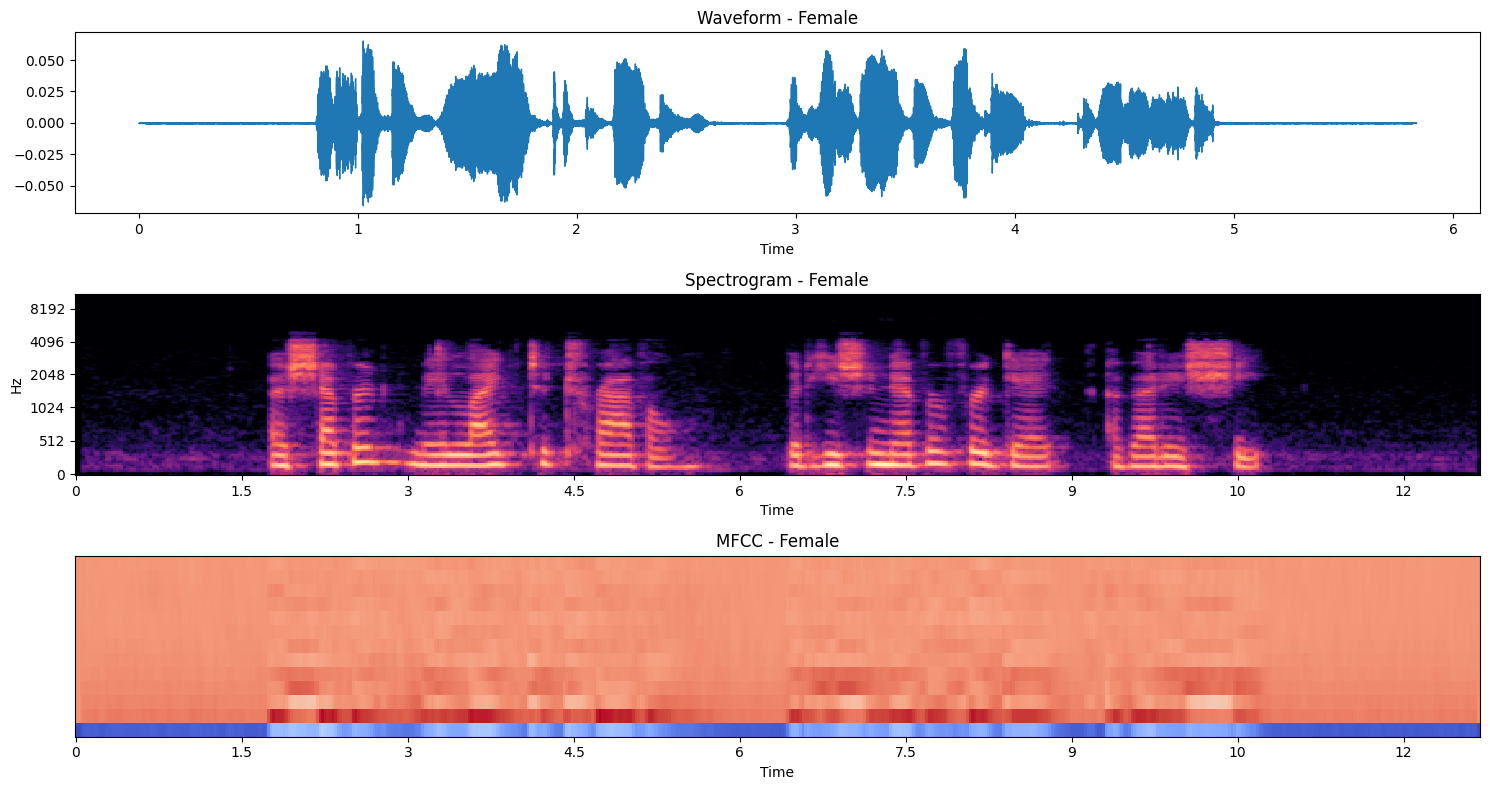

Plotting features for /kaggle/input/common-voice/cv-valid-train/cv-valid-train/sample-000013.mp3


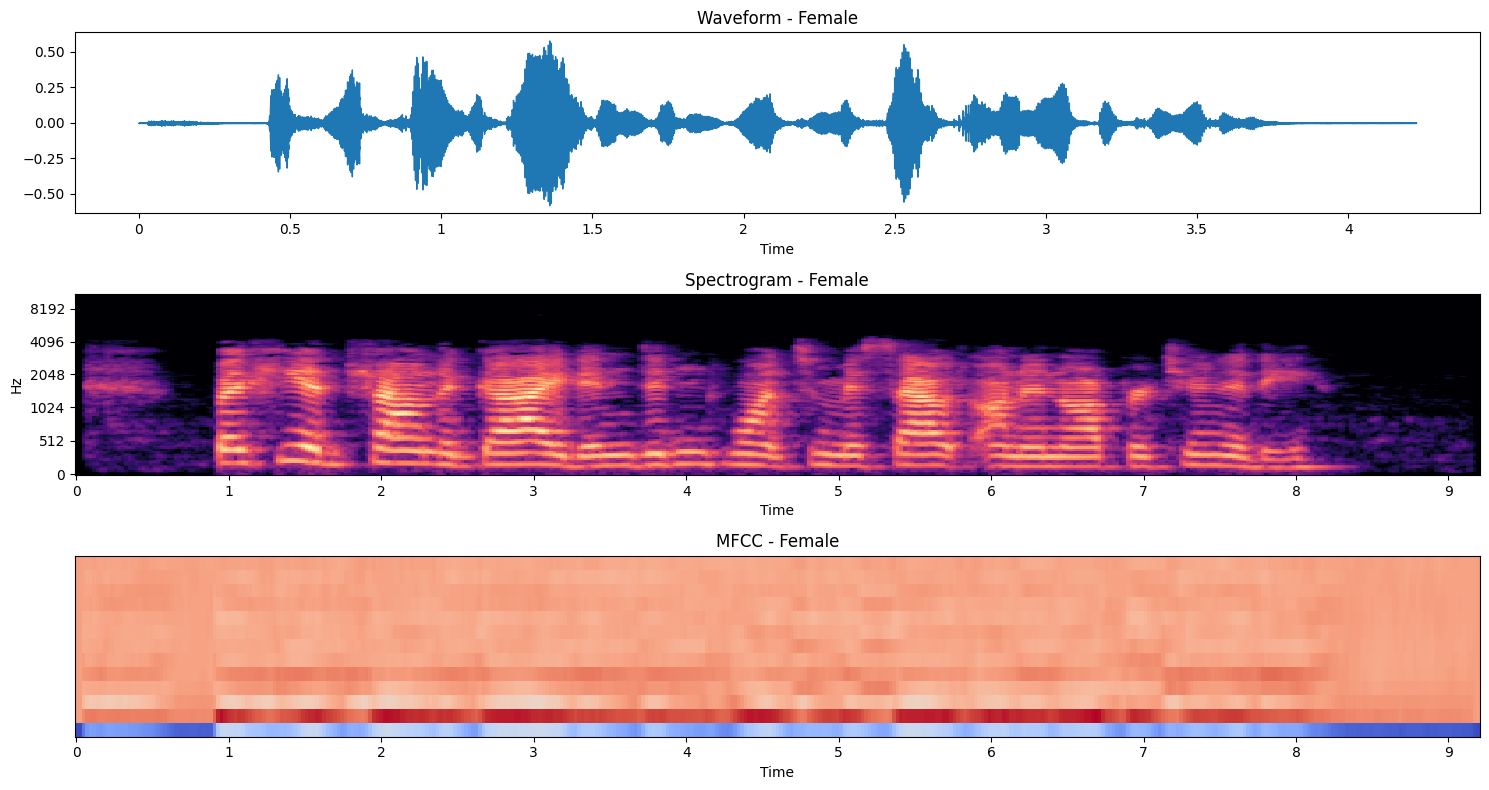

Plotting features for /kaggle/input/common-voice/cv-valid-train/cv-valid-train/sample-000008.mp3


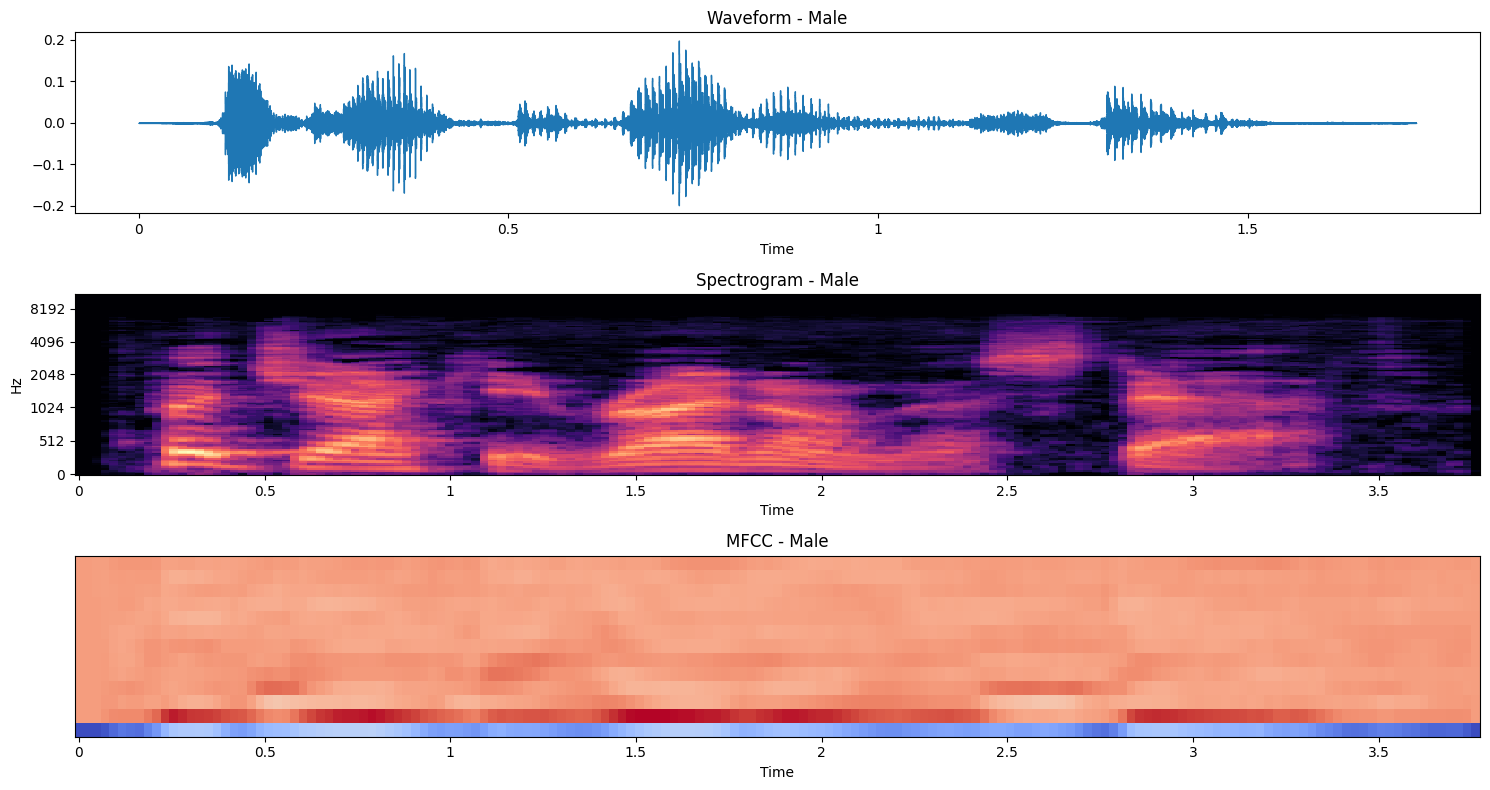

Plotting features for /kaggle/input/common-voice/cv-valid-train/cv-valid-train/sample-000014.mp3


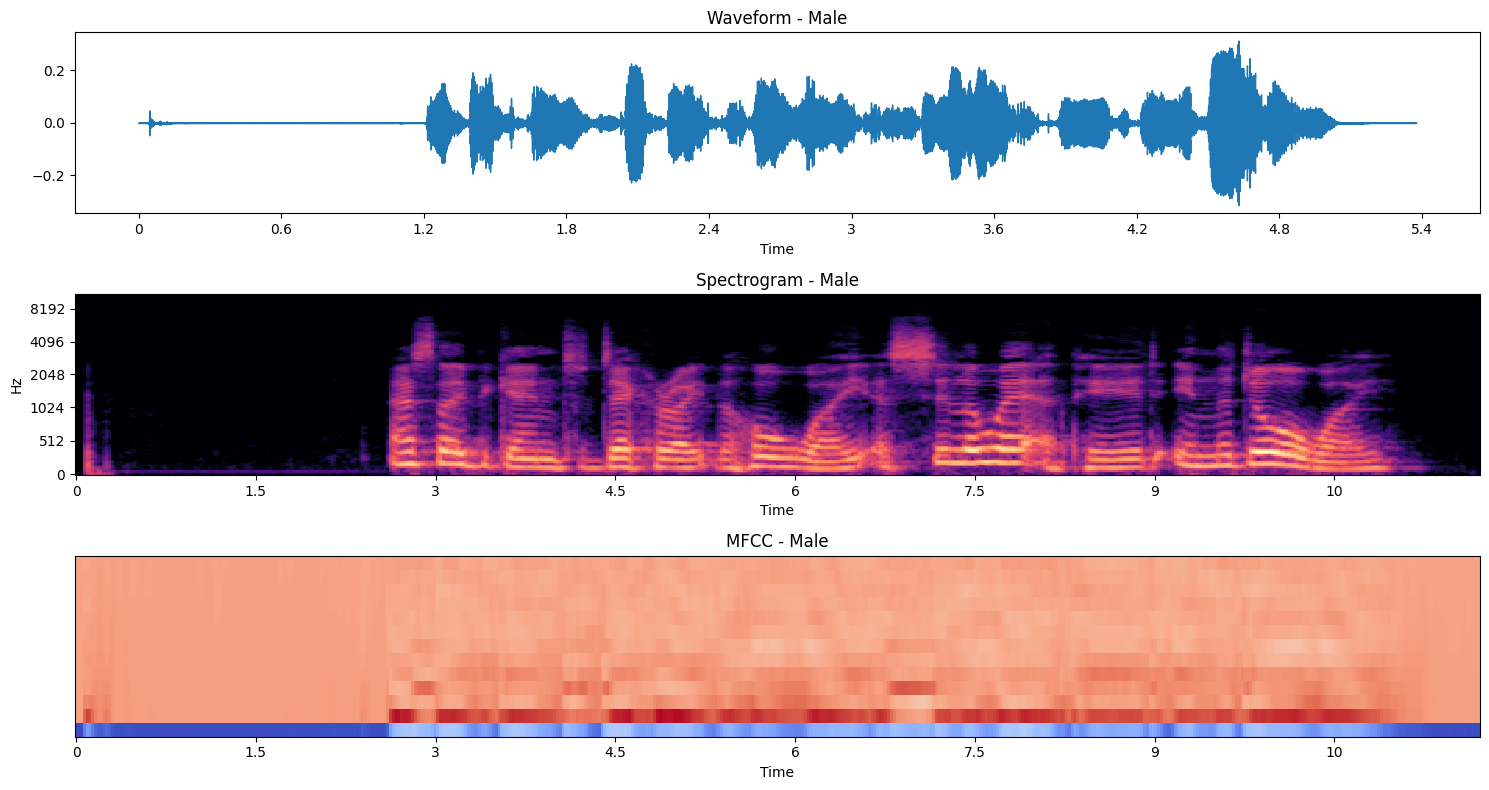

In [17]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

audio_folder_path = '/kaggle/input/common-voice/cv-valid-train/cv-valid-train'

# Extract two female and two male filenames from dftrain
female_files = dftrain[dftrain['gender'] == 'female']['filename'].head(2)
male_files = dftrain[dftrain['gender'] == 'male']['filename'].head(2)

# Function to plot waveform, spectrogram, and MFCC
def plot_features(file_path, gender):
    audio, sr = librosa.load(file_path, sr=None)
    
    plt.figure(figsize=(15, 8))

    # Plot Waveform
    plt.subplot(3, 1, 1)
    librosa.display.waveshow(audio, sr=sr)
    plt.title(f'Waveform - {gender}')
    
    # Plot Spectrogram
    plt.subplot(3, 1, 2)
    S = librosa.feature.melspectrogram(y=audio, sr=sr)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', x_axis='time')
    plt.title(f'Spectrogram - {gender}')

    # Plot MFCC
    plt.subplot(3, 1, 3)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.title(f'MFCC - {gender}')

    plt.tight_layout()
    plt.show()

# Plot features for female files
for file in female_files:
    file_path = os.path.join(audio_folder_path, file.split('/')[-1])
    print(f"Plotting features for {file_path}")
    plot_features(file_path, 'Female')

# Plot features for male files
for file in male_files:
    file_path = os.path.join(audio_folder_path, file.split('/')[-1])
    print(f"Plotting features for {file_path}")
    plot_features(file_path, 'Male')


In [18]:
!pip install pyworld

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 8.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyworld: filename=pyworld-0.3.4-cp310-cp310-linux_x86_64.whl size=202650 sha256=c7cba3fbbb4dfcf3d8fb87b7f7a7aff592b8fea38fd8b34ce55b485d3e36f4e2
  Stored in directory: /root/.cache/pip/wheels/66/09/8a/a1d79b73d59756f66e9bfe55a199840efc7473adb76ddacdfd
Successfully built pyworld


Visualizing Pitch Contour graphs using pyworld library:

PyWorld is a versatile library for analyzing and manipulating various aspects of speech signals, making it valuable in fields such as speech processing, speech synthesis, and voice analysis.

The pitch contour in audio signals refers to the variation in pitch (frequency) over time. In the context of gender, there are some general characteristics that might be observed in the pitch contour for males and females:

Pitch Range:

Females typically have a higher pitch range than males. This means that the fundamental frequency of female voices tends to cover a broader range of frequencies.

Average Pitch:

The average pitch for females is generally higher than that for males. This can be observed as a higher baseline in the pitch contour.

Stability:

Female pitch contours may exhibit more variability and rapid changes compared to male pitch contours, which may be more stable.

Formants:

Formants, which are resonant frequencies in the vocal tract, can also contribute to gender differences. While pitch primarily relates to the fundamental frequency, formants can affect the overall timbre of the voice.

Harmonics:

The distribution and strength of harmonics (integer multiples of the fundamental frequency) may differ between male and female voices.

Plotting pitch contour for /kaggle/input/common-voice/cv-valid-train/cv-valid-train/sample-000005.mp3
Plotting pitch contour for /kaggle/input/common-voice/cv-valid-train/cv-valid-train/sample-000013.mp3
Plotting pitch contour for /kaggle/input/common-voice/cv-valid-train/cv-valid-train/sample-000008.mp3
Plotting pitch contour for /kaggle/input/common-voice/cv-valid-train/cv-valid-train/sample-000014.mp3


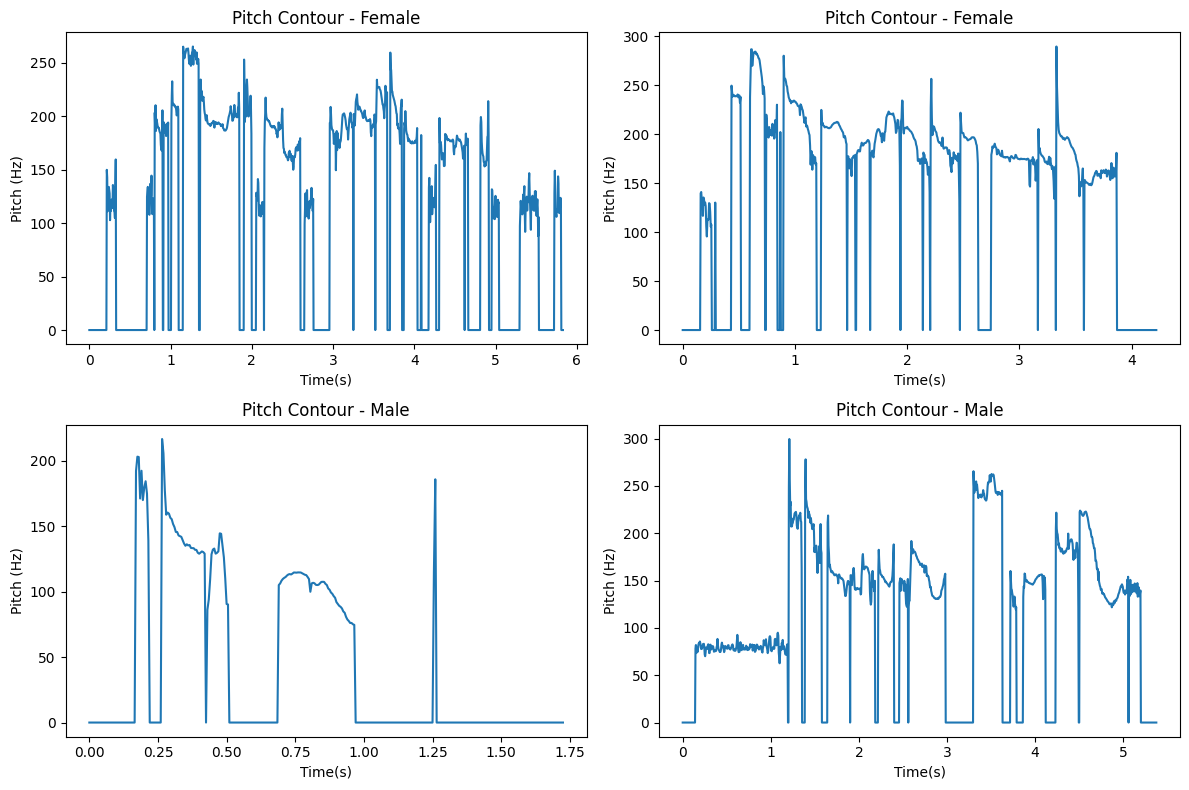

In [19]:
import os
import librosa
import pyworld as pw
import matplotlib.pyplot as plt

# actual path to your audio files
audio_folder_path = '/kaggle/input/common-voice/cv-valid-train/cv-valid-train'

# Extract two female and two male filenames from dftrain
female_files = dftrain[dftrain['gender'] == 'female']['filename'].head(2)
male_files = dftrain[dftrain['gender'] == 'male']['filename'].head(2)

def plot_pitch_contour(file_path, gender, subplot_index):
    # Load audio file
    audio, sr = librosa.load(file_path, sr=None)

    # Convert audio data to double
    audio = audio.astype('double')

    # Extract pitch using pyworld
    _f0, t = pw.dio(audio, sr)  # Dio algorithm
    f0 = pw.stonemask(audio, _f0, t, sr)

    # Plot pitch contour
    plt.subplot(2, 2, subplot_index)
    plt.plot(t, f0)
    plt.title(f'Pitch Contour - {gender}')
    plt.xlabel('Time(s)')
    plt.ylabel('Pitch (Hz)')

# Plot pitch contour for female files
plt.figure(figsize=(12, 8))
for i, file in enumerate(female_files, 1):
    file_path = os.path.join(audio_folder_path, file.split('/')[-1])
    print(f"Plotting pitch contour for {file_path}")
    plot_pitch_contour(file_path, 'Female', i)

# Plot pitch contour for male files
for i, file in enumerate(male_files, 1):
    file_path = os.path.join(audio_folder_path, file.split('/')[-1])
    print(f"Plotting pitch contour for {file_path}")
    plot_pitch_contour(file_path, 'Male', i + 2)  
plt.tight_layout()
plt.show()


Differences can be observed between male and female speakers observing the Pitch Contour graphs.

## Feature Extraction

In speech recognition, feature extraction refers to the process of transforming raw audio waveforms into a set of representative features that can be used as input for machine learning models. The goal is to capture relevant information from the audio signal that is useful for distinguishing between different phonemes, words, or utterances. Feature extraction is a crucial step in the overall speech recognition pipeline. 

We extract 3 different groups of features from the audio files to be used in our neural network model.

MFCCs are coefficients representing the short-term power spectrum of a sound signal.
n_mfcc specifies the number of coefficients to be extracted.
The resulting mfcc_features matrix contains the MFCCs over time.

Chroma features are used to represent the energy distribution of pitch classes (distinct musical notes) in an audio signal.
n_chroma specifies the number of chroma bins to be extracted.
The resulting chroma_features matrix contains the chroma features over time.

Spectral contrast measures the difference in amplitude between peaks and valleys in the spectrum of an audio signal.
n_bands specifies the number of contrast bands to be extracted. The min(num_features, 6) is used to handle a Nyquist error.
The resulting contrast_features matrix contains the spectral contrast features over time.

These features are commonly used in audio signal processing and are often employed as input features for machine learning models in tasks such as speech recognition, music genre classification, and audio analysis. Each feature type captures different aspects of the audio signal, providing valuable information for various applications.

Once the features are extracted, we will be adding these as new columns into our csv file for input into our training and evaluation. Each feature extracted will be in an array format, so will need to take the average of the numbers in the array so we can use that number as the feature for that specific audio file.

In [20]:
import os
import librosa
import numpy as np
import pandas as pd
from concurrent.futures import ThreadPoolExecutor

# Assuming dftrain is your DataFrame with 'filename' and 'gender' columns
# Replace this with the actual path to your audio files
audio_folder_path = '/kaggle/input/common-voice/cv-valid-train/cv-valid-train'

def extract_audio_features(file_path, num_features=28):
    try:
        audio, sr = librosa.load(file_path, sr=None)
        
        # Extract MFCC features
        mfcc_features = librosa.feature.mfcc(y=audio, n_mfcc=num_features)

        # Extract Chroma features
        chroma_features = librosa.feature.chroma_stft(y=audio, n_chroma=num_features)

        # Reduce either fmin or n_bands to address the Nyquist error
        contrast_features = librosa.feature.spectral_contrast(y=audio, n_bands=min(num_features, 6))

        # Concatenate all features
        all_features = np.concatenate((mfcc_features, chroma_features, contrast_features), axis=0)

        # Take the mean along the columns (axis=1)
        audio_features_mean = np.mean(all_features, axis=1)
        
        return audio_features_mean
    except Exception as e:
        print(f"Error processing file: {file_path}")
        print(e)
        return None


# Function to process a single row in dftrain
def process_row(row, feature_columns):
    file_name = row['filename'].split('/')[-1]
    file_path = os.path.join(audio_folder_path, file_name)

    if os.path.exists(file_path):
        audio_features_mean = extract_audio_features(file_path)
        
        if audio_features_mean is not None:
            # Add the mean audio features to the DataFrame
            for i, column in enumerate(feature_columns):
                dftrain.at[row.name, column] = audio_features_mean[i]
        else:
            # Handle the case where feature extraction failed
            print(f"Skipping file: {file_path}")

# Define the feature columns
audio_columns = [f'audio_feature_mean_{i}' for i in range(1, 29)]  # Adjusted to 28 audio features

# Add columns to store mean audio features
for column in audio_columns:
    dftrain[column] = None

# Extract mean audio features for the first 10,000 files in dftrain and add them as new columns using ThreadPoolExecutor
with ThreadPoolExecutor() as executor:
    futures = [executor.submit(process_row, row, audio_columns) for _, row in dftrain.head(10000).iterrows()]

# Wait for all tasks to complete
for future in futures:
    future.result()

dftrain.head()

filename  \
5   cv-valid-train/sample-000005.mp3   
8   cv-valid-train/sample-000008.mp3   
13  cv-valid-train/sample-000013.mp3   
14  cv-valid-train/sample-000014.mp3   
19  cv-valid-train/sample-000019.mp3   

                                                                          text  \
5     a shepherd may like to travel but he should never forget about his sheep   
8                                                put jackie right on the staff   
13      but he had found a guide and didn't want to miss out on an opportunity   
14  as they began to decorate the hallway a silhouette appeared in the doorway   
19                            then they got ahold of some dough and went goofy   

    up_votes  down_votes        age  gender     accent  duration  \
5          1           0   twenties  female         us       NaN   
8          3           0  seventies    male         us       NaN   
13         1           0   thirties  female         us       NaN   
14         1           0    sixties    male    england       NaN   
19         1           0    fifties    male  australia       NaN   

   audio_feature_mean_1 audio_feature_mean_2  ... audio_feature_mean_19  \
5            -624.64845           112.143108  ...             -5.971159   
8           -465.450035           129.926527  ...             -5.994767   
13          -418.681912           172.238831  ...             -3.799932   
14           -467.83601           110.097388  ...              3.735575   
19          -349.425841           142.363607  ...             -2.016612   

   audio_feature_mean_20 audio_feature_mean_21 audio_feature_mean_22  \
5              -8.026087             -7.050545             -2.395902   
8              -7.321054              2.136042             -0.519819   
13             -3.680292              -4.29386             -6.237995   
14             -1.972156              -7.34892             -5.085369   
19              7.757106              4.051686             -1.432404   

   audio_feature_mean_23 audio_feature_mean_24 audio_feature_mean_25  \
5              -0.461247             -6.477646             -9.048361   
8              -0.091373              3.036303              2.391195   
13             -6.864157             -3.539646             -0.671063   
14              1.642962              1.989853             -2.697836   
19              -3.45612              2.198118              1.136141   

   audio_feature_mean_26 audio_feature_mean_27 audio_feature_mean_28  
5              -3.291855             -0.834687             -3.752578  
8               3.747133             -1.438698              -5.46998  
13             -3.323204             -5.448706             -2.413586  
14             -2.652054              0.340485             -0.831763  
19              3.889407             -1.568396              0.262695  

[5 rows x 36 columns]

Observing the consolidated csv file that now has extracted features, we will only utilize 10000 rows where data is not blank

In [21]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74059 entries, 5 to 195774
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   filename               74059 non-null  object 
 1   text                   74059 non-null  object 
 2   up_votes               74059 non-null  int64  
 3   down_votes             74059 non-null  int64  
 4   age                    73466 non-null  object 
 5   gender                 74059 non-null  object 
 6   accent                 63756 non-null  object 
 7   duration               0 non-null      float64
 8   audio_feature_mean_1   10000 non-null  object 
 9   audio_feature_mean_2   10000 non-null  object 
 10  audio_feature_mean_3   10000 non-null  object 
 11  audio_feature_mean_4   10000 non-null  object 
 12  audio_feature_mean_5   10000 non-null  object 
 13  audio_feature_mean_6   10000 non-null  object 
 14  audio_feature_mean_7   10000 non-null  object 
 15  audio_

## Data Preprocessing

Looking at the gender distribution. Target feature is imbalanced. We will remove the other category since there is not enough data to train.

In [22]:

grouped_data = dftrain[dftrain['audio_feature_mean_1'].notnull()].groupby('gender').size()

# Display the result
print(grouped_data)


gender
female    2494
male      7396
other      110
dtype: int64


We are only picking non null values from the dataset

In [23]:
dftrain = dftrain[dftrain['audio_feature_mean_1'].notnull()]
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 5 to 26677
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   filename               10000 non-null  object 
 1   text                   10000 non-null  object 
 2   up_votes               10000 non-null  int64  
 3   down_votes             10000 non-null  int64  
 4   age                    9925 non-null   object 
 5   gender                 10000 non-null  object 
 6   accent                 8611 non-null   object 
 7   duration               0 non-null      float64
 8   audio_feature_mean_1   10000 non-null  object 
 9   audio_feature_mean_2   10000 non-null  object 
 10  audio_feature_mean_3   10000 non-null  object 
 11  audio_feature_mean_4   10000 non-null  object 
 12  audio_feature_mean_5   10000 non-null  object 
 13  audio_feature_mean_6   10000 non-null  object 
 14  audio_feature_mean_7   10000 non-null  object 
 15  audio_f

In [24]:
# Removing rows where gender="other"
dftrain = dftrain[dftrain['gender'] != 'other']
gender_counts = dftrain['gender'].value_counts()
print(gender_counts)


gender
male      7396
female    2494
Name: count, dtype: int64


Also removing extra columns we will not use in our training

In [25]:
columns_to_remove = ['filename', 'text', 'up_votes', 'down_votes', 'age', 'accent', 'duration']
dftrain = dftrain.drop(columns=columns_to_remove, errors='ignore')

# Display the updated DataFrame
dftrain.head()


gender audio_feature_mean_1 audio_feature_mean_2 audio_feature_mean_3  \
5   female           -624.64845           112.143108             4.192413   
8     male          -465.450035           129.926527             2.688099   
13  female          -418.681912           172.238831           -19.381152   
14    male           -467.83601           110.097388            21.651706   
19    male          -349.425841           142.363607             7.281966   

   audio_feature_mean_4 audio_feature_mean_5 audio_feature_mean_6  \
5             15.206001            40.390527            18.015288   
8             12.046795            -7.246882             5.112118   
13            -29.69637            23.518189             13.75843   
14            17.568869             28.39657            25.320974   
19            59.582687            -8.232775            22.511037   

   audio_feature_mean_7 audio_feature_mean_8 audio_feature_mean_9  ...  \
5             11.383596            19.198262              8.97747  ...   
8              6.854224             3.925436            13.581924  ...   
13             3.875653            15.112429             4.395624  ...   
14            18.938298             10.20823             3.628809  ...   
19             8.254273             8.506161             3.063954  ...   

   audio_feature_mean_19 audio_feature_mean_20 audio_feature_mean_21  \
5              -5.971159             -8.026087             -7.050545   
8              -5.994767             -7.321054              2.136042   
13             -3.799932             -3.680292              -4.29386   
14              3.735575             -1.972156              -7.34892   
19             -2.016612              7.757106              4.051686   

   audio_feature_mean_22 audio_feature_mean_23 audio_feature_mean_24  \
5              -2.395902             -0.461247             -6.477646   
8              -0.519819             -0.091373              3.036303   
13             -6.237995             -6.864157             -3.539646   
14             -5.085369              1.642962              1.989853   
19             -1.432404              -3.45612              2.198118   

   audio_feature_mean_25 audio_feature_mean_26 audio_feature_mean_27  \
5              -9.048361             -3.291855             -0.834687   
8               2.391195              3.747133             -1.438698   
13             -0.671063             -3.323204             -5.448706   
14             -2.697836             -2.652054              0.340485   
19              1.136141              3.889407             -1.568396   

   audio_feature_mean_28  
5              -3.752578  
8               -5.46998  
13             -2.413586  
14             -0.831763  
19              0.262695  

[5 rows x 29 columns]

label encoding(converting categorical features to numbers) the gender column to see the correleation matrix

In [26]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'gender' is the column to be encoded
label_encoder = LabelEncoder()
dftrain['gender_encoded'] = label_encoder.fit_transform(dftrain['gender'])
dftrain.head()

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


gender audio_feature_mean_1 audio_feature_mean_2 audio_feature_mean_3  \
5   female           -624.64845           112.143108             4.192413   
8     male          -465.450035           129.926527             2.688099   
13  female          -418.681912           172.238831           -19.381152   
14    male           -467.83601           110.097388            21.651706   
19    male          -349.425841           142.363607             7.281966   

   audio_feature_mean_4 audio_feature_mean_5 audio_feature_mean_6  \
5             15.206001            40.390527            18.015288   
8             12.046795            -7.246882             5.112118   
13            -29.69637            23.518189             13.75843   
14            17.568869             28.39657            25.320974   
19            59.582687            -8.232775            22.511037   

   audio_feature_mean_7 audio_feature_mean_8 audio_feature_mean_9  ...  \
5             11.383596            19.198262              8.97747  ...   
8              6.854224             3.925436            13.581924  ...   
13             3.875653            15.112429             4.395624  ...   
14            18.938298             10.20823             3.628809  ...   
19             8.254273             8.506161             3.063954  ...   

   audio_feature_mean_20 audio_feature_mean_21 audio_feature_mean_22  \
5              -8.026087             -7.050545             -2.395902   
8              -7.321054              2.136042             -0.519819   
13             -3.680292              -4.29386             -6.237995   
14             -1.972156              -7.34892             -5.085369   
19              7.757106              4.051686             -1.432404   

   audio_feature_mean_23 audio_feature_mean_24 audio_feature_mean_25  \
5              -0.461247             -6.477646             -9.048361   
8              -0.091373              3.036303              2.391195   
13             -6.864157             -3.539646             -0.671063   
14              1.642962              1.989853             -2.697836   
19              -3.45612              2.198118              1.136141   

   audio_feature_mean_26 audio_feature_mean_27 audio_feature_mean_28  \
5              -3.291855             -0.834687             -3.752578   
8               3.747133             -1.438698              -5.46998   
13             -3.323204             -5.448706             -2.413586   
14             -2.652054              0.340485             -0.831763   
19              3.889407             -1.568396              0.262695   

   gender_encoded  
5               0  
8               1  
13              0  
14              1  
19              1  

[5 rows x 30 columns]

In [27]:
# Convert all columns to float except for 'gender'
dftrain[dftrain.columns.difference(['gender'])] = dftrain[dftrain.columns.difference(['gender'])].apply(pd.to_numeric, errors='coerce')

dftrain.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9890 entries, 5 to 26677
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 9890 non-null   object 
 1   audio_feature_mean_1   9890 non-null   float64
 2   audio_feature_mean_2   9890 non-null   float64
 3   audio_feature_mean_3   9890 non-null   float64
 4   audio_feature_mean_4   9890 non-null   float64
 5   audio_feature_mean_5   9890 non-null   float64
 6   audio_feature_mean_6   9890 non-null   float64
 7   audio_feature_mean_7   9890 non-null   float64
 8   audio_feature_mean_8   9890 non-null   float64
 9   audio_feature_mean_9   9890 non-null   float64
 10  audio_feature_mean_10  9890 non-null   float64
 11  audio_feature_mean_11  9890 non-null   float64
 12  audio_feature_mean_12  9890 non-null   float64
 13  audio_feature_mean_13  9890 non-null   float64
 14  audio_feature_mean_14  9890 non-null   float64
 15  audio_fe

Correlation heatmap. We are only viewing features where ABS value of the correlation against the target feature is greater than 0.1. Rest of the features will be removed from the model training.

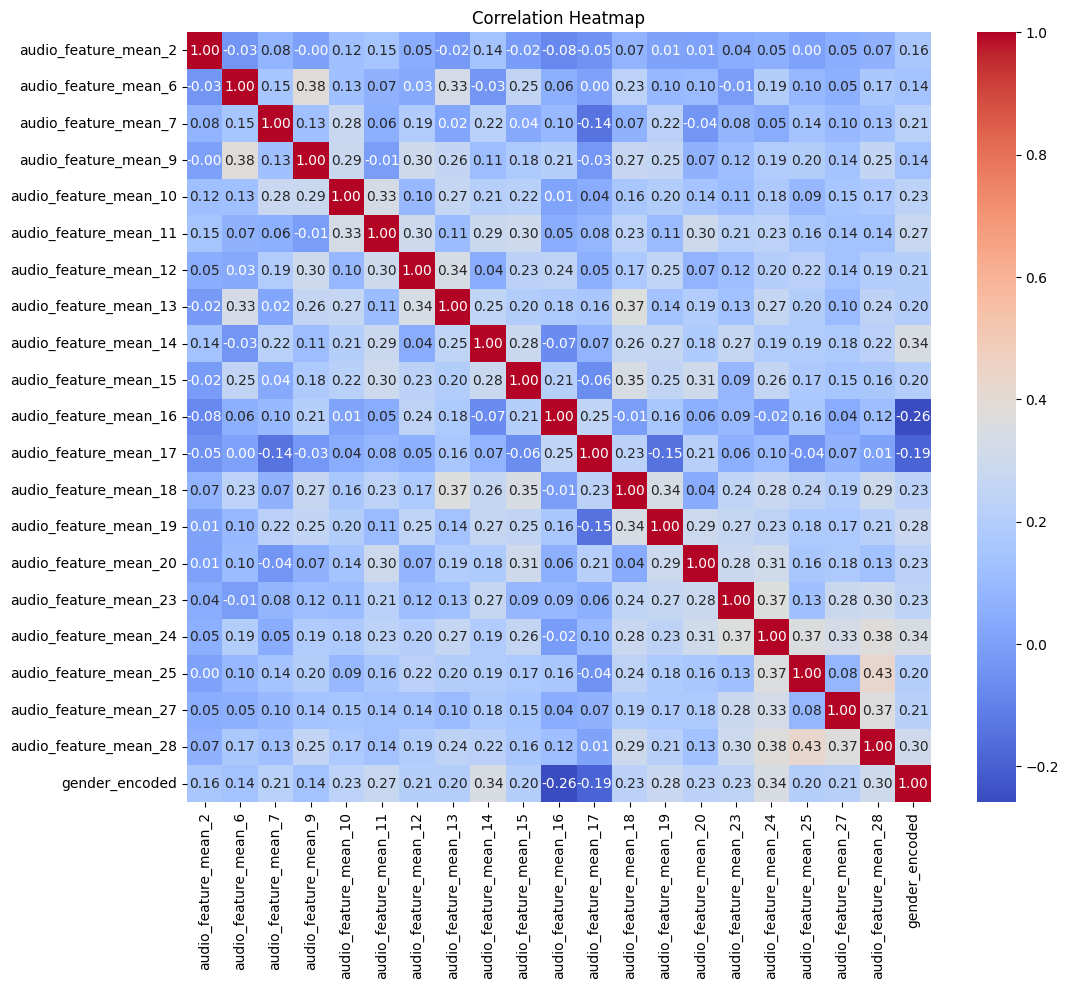

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dftrain is your DataFrame

# Exclude 'gender' column from correlation matrix for visualization
correlation_matrix = dftrain.drop(columns=['gender']).corr()

# Extract features with correlation less than 0.1 or greater than -0.1 with 'gender_encoded'
correlated_features = correlation_matrix[abs(correlation_matrix['gender_encoded']) < 0.1].index

# Drop the correlated features from the correlation matrix
correlation_matrix_filtered = correlation_matrix.drop(correlated_features, axis=1).drop(correlated_features, axis=0)

# Plot the filtered correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



In [29]:
# Drop features with ABS value of correlation less than 0.1 with target 
dftrain_filtered = dftrain.drop(correlated_features, axis=1)

# Display the first few rows of the filtered DataFrame
dftrain_filtered.head()


gender  audio_feature_mean_2  audio_feature_mean_6  audio_feature_mean_7  \
5   female            112.143108             18.015288             11.383596   
8     male            129.926527              5.112118              6.854224   
13  female            172.238831             13.758430              3.875653   
14    male            110.097388             25.320974             18.938298   
19    male            142.363607             22.511037              8.254273   

    audio_feature_mean_9  audio_feature_mean_10  audio_feature_mean_11  \
5               8.977470               0.388083               0.077003   
8              13.581924              -3.678910               1.513629   
13              4.395624              -8.858242              -6.087342   
14              3.628809               0.959613               0.649734   
19              3.063954               2.262862              11.316522   

    audio_feature_mean_12  audio_feature_mean_13  audio_feature_mean_14  ...  \
5               -3.276914              -3.282056              -1.716983  ...   
8                3.810098              -5.460868              -5.027655  ...   
13              -6.997772              -8.206118              -2.190923  ...   
14              -3.542648              -6.408256              -1.218591  ...   
19               1.515864               9.225243               1.678961  ...   

    audio_feature_mean_17  audio_feature_mean_18  audio_feature_mean_19  \
5                2.402926              -0.899446              -5.971159   
8              -10.228558              -4.011668              -5.994767   
13              -6.969988              -4.291746              -3.799932   
14              -9.934082              -0.541962               3.735575   
19               4.501694               3.165058              -2.016612   

    audio_feature_mean_20  audio_feature_mean_23  audio_feature_mean_24  \
5               -8.026087              -0.461247              -6.477646   
8               -7.321054              -0.091373               3.036303   
13              -3.680292              -6.864157              -3.539646   
14              -1.972156               1.642962               1.989853   
19               7.757106              -3.456120               2.198118   

    audio_feature_mean_25  audio_feature_mean_27  audio_feature_mean_28  \
5               -9.048361              -0.834687              -3.752578   
8                2.391195              -1.438698              -5.469980   
13              -0.671063              -5.448706              -2.413586   
14              -2.697836               0.340485              -0.831763   
19               1.136141              -1.568396               0.262695   

    gender_encoded  
5                0  
8                1  
13               0  
14               1  
19               1  

[5 rows x 22 columns]

In [30]:
unique_gender_counts = dftrain_filtered['gender'].value_counts()

# Display the count of unique values
print(unique_gender_counts)


gender
male      7396
female    2494
Name: count, dtype: int64


We are dropping the encoded gender column because we will need to label encode after the train/test split to avoid data leakage.

In [31]:
# Drop the 'gender_encoded' column
dftrain_filtered = dftrain_filtered.drop(columns=['gender_encoded'])
dftrain_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9890 entries, 5 to 26677
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 9890 non-null   object 
 1   audio_feature_mean_2   9890 non-null   float64
 2   audio_feature_mean_6   9890 non-null   float64
 3   audio_feature_mean_7   9890 non-null   float64
 4   audio_feature_mean_9   9890 non-null   float64
 5   audio_feature_mean_10  9890 non-null   float64
 6   audio_feature_mean_11  9890 non-null   float64
 7   audio_feature_mean_12  9890 non-null   float64
 8   audio_feature_mean_13  9890 non-null   float64
 9   audio_feature_mean_14  9890 non-null   float64
 10  audio_feature_mean_15  9890 non-null   float64
 11  audio_feature_mean_16  9890 non-null   float64
 12  audio_feature_mean_17  9890 non-null   float64
 13  audio_feature_mean_18  9890 non-null   float64
 14  audio_feature_mean_19  9890 non-null   float64
 15  audio_fe

## Model Set up - Training and Evaluation

1) We will be using a simple neural network model from tensorflow library.

2) We will balance the target feature(60/40) after train/test split using SMOTE. Only train data is balanced.

3) We will be scaling our data using MinMax scaler after the data split.Both test and train data will be scaled.

4) Also applying label encoding to the traget feature(gender) after the data split. Both train and test data is encoded.

5) We will use 5 fold cross validation during training.

6) Split the data into 80/20 train/test.

7) Train using 20 Epochs with basic set up and few layers.

8) Use the best cross val fold to evaluate on the test set.

9) Evaluate results using confusion matrix and classification reports

Below are the explanations of some of the terminology mentioned above:

SMOTE (Synthetic Minority Over-sampling Technique):

Purpose: 

SMOTE is a technique used to address the class imbalance problem in machine learning, particularly in classification tasks where one class has significantly fewer instances than the other.

How it Works: 

SMOTE generates synthetic samples for the minority class by creating new instances along the line segments connecting existing minority class instances. This helps balance the class distribution, making the model less biased towards the majority class.

Cross-Validation:

Purpose: 

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. It is primarily used to assess a model's performance and generalization capability.


How it Works: 

The most common form of cross-validation is k-fold cross-validation. The data is divided into k subsets (folds), and the model is trained and evaluated k times, each time using a different fold as the test set and the remaining data as the training set. This helps ensure that the model's performance is not dependent on a specific subset of the data.

Min-Max Scaling (Normalization):

Purpose:

Min-Max scaling, also known as normalization, is a preprocessing technique used to scale numerical features to a specific range, typically [0, 1]. It is essential when features have different scales, preventing one feature from dominating others during the training process.

How it Works: 

For each feature, the minimum value is subtracted, and the result is divided by the range (the difference between the maximum and minimum values). This scales the feature values to a common range, making them comparable.


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

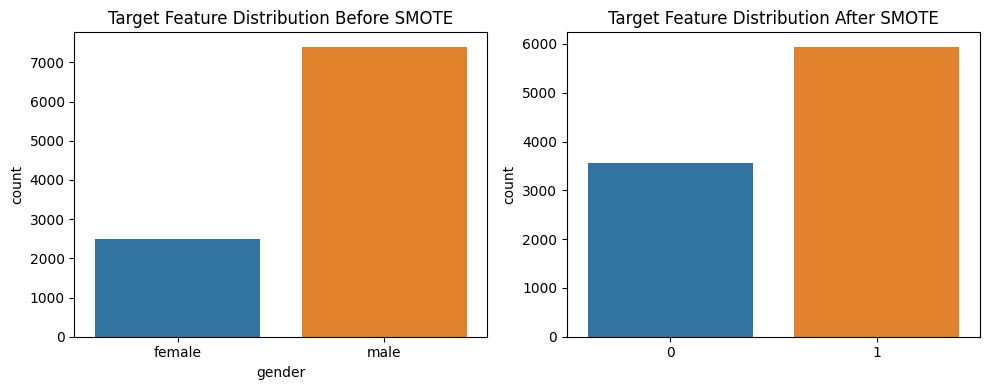

In [32]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle

X = dftrain_filtered.drop(columns=['gender'])
y = dftrain_filtered['gender']

# Step 1: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Label Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 3: SMOTE for balancing classes
smote = SMOTE(sampling_strategy=0.6, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)

# Step 4: Min-Max Scaling
scaler = MinMaxScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Plot the distribution of the target feature before SMOTE
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='gender', data=dftrain_filtered)
plt.title('Target Feature Distribution Before SMOTE')

# Plot the distribution of the target feature after SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_resampled)
plt.title('Target Feature Distribution After SMOTE')

plt.tight_layout()
plt.show()

Preparing data after x-val for model training

In [33]:
import tensorflow as tf

# Step 4: Build and Train TensorFlow Model with 5-fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Assuming X_train_resampled_scaled and y_train_resampled are NumPy arrays

# Convert back to DataFrames and drop the target column
X_train_resampled_scaled_df = pd.DataFrame(X_train_resampled_scaled, columns=dftrain_filtered.columns[1:])  # Exclude the first column
X_train_resampled_scaled_df.insert(0, dftrain_filtered.columns[0], dftrain_filtered[dftrain_filtered.columns[0]])  # Insert the first column at the beginning
X_train_resampled_scaled_df = X_train_resampled_scaled_df.drop(columns=['gender'])  # Drop the target column


y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=['gender'])  # Assuming the target column name is 'gender'


Training and Evalaution - Best model is picked after training using 5 folds and evaluated using the unseen test data

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):



Fold 1:
Epoch 1/20
238/238 [==============================] - 3s 4ms/step - loss: 0.5990 - accuracy: 0.6436 - val_loss: 0.5484 - val_accuracy: 0.6896
Epoch 2/20
238/238 [==============================] - 1s 3ms/step - loss: 0.5068 - accuracy: 0.7630 - val_loss: 0.4668 - val_accuracy: 0.7701
Epoch 3/20
238/238 [==============================] - 1s 3ms/step - loss: 0.4399 - accuracy: 0.8174 - val_loss: 0.4248 - val_accuracy: 0.7927
Epoch 4/20
238/238 [==============================] - 1s 3ms/step - loss: 0.4051 - accuracy: 0.8273 - val_loss: 0.3973 - val_accuracy: 0.8406
Epoch 5/20
238/238 [==============================] - 1s 3ms/step - loss: 0.3867 - accuracy: 0.8328 - val_loss: 0.3859 - val_accuracy: 0.8275
Epoch 6/20
238/238 [==============================] - 1s 3ms/step - loss: 0.3759 - accuracy: 0.8348 - val_loss: 0.3748 - val_accuracy: 0.8332
Epoch 7/20
238/238 [==============================] - 1s 3ms/step - loss: 0.3701 - accuracy: 0.8355 - val_loss: 0.3686 - val_accuracy: 0.83

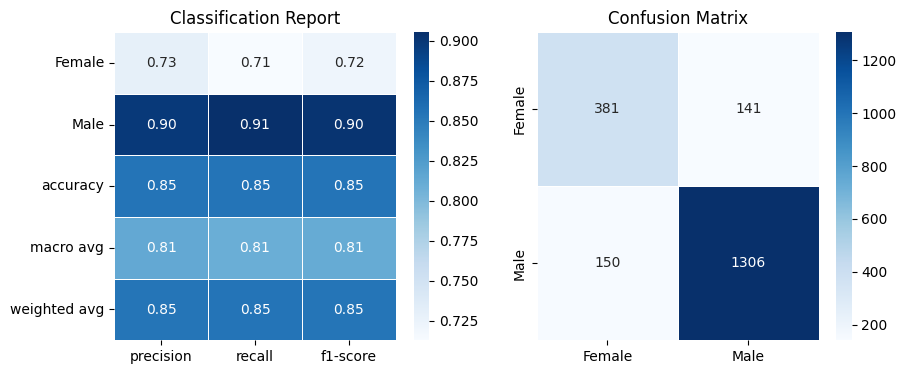

In [34]:
# Mapping dictionary for class labels
class_label_mapping = {0: 'Female', 1: 'Male'}  # Replace with your actual class labels

# Placeholder for the best fold's results
best_fold_results = None
best_fold = None

# Loop through folds
for fold_num, (train_index, val_index) in enumerate(kf.split(X_train_resampled_scaled_df, y_train_resampled_df), 1):
    X_train_fold, X_val_fold = X_train_resampled_scaled_df.iloc[train_index], X_train_resampled_scaled_df.iloc[val_index]
    y_train_fold, y_val_fold = y_train_resampled_df.iloc[train_index], y_train_resampled_df.iloc[val_index]

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_resampled_scaled_df.shape[1],)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Convert data types to float32
    X_train_fold = X_train_fold.astype('float32')
    X_val_fold = X_val_fold.astype('float32')
    y_train_fold = y_train_fold.astype('int')  
    y_val_fold = y_val_fold.astype('int')  
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Training
    print(f"\nFold {fold_num}:")
    history = model.fit(X_train_fold, y_train_fold, epochs=20, batch_size=32, validation_data=(X_val_fold, y_val_fold))

    # Evaluate on Test Set
    test_predictions = (model.predict(X_test_scaled) > 0.5).astype(int)
    cm_test = confusion_matrix(y_test_encoded, test_predictions)
    report_test = classification_report(y_test_encoded, test_predictions, target_names=[class_label_mapping[i] for i in range(len(class_label_mapping))], output_dict=True)

    # Save results if it's the best fold so far
    if best_fold_results is None or report_test['accuracy'] > best_fold_results['accuracy']:
        best_fold_results = report_test
        best_fold = fold_num

# Display Best Fold's Results
print(f"\nBest Fold: {best_fold}")
#print("Best Fold's Classification Report:")
#print(best_fold_results)

# Plot Classification Report and Confusion Matrix Heatmaps Side by Side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Classification Report Heatmap
sns.heatmap(pd.DataFrame(best_fold_results).iloc[:-1, :].T, annot=True, cmap='Blues', fmt=".2f", linewidths=.5, ax=axes[0])
axes[0].set_title('Classification Report')

# Confusion Matrix Heatmap
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g', linewidths=.5, xticklabels=[class_label_mapping[i] for i in range(len(class_label_mapping))], yticklabels=[class_label_mapping[i] for i in range(len(class_label_mapping))], ax=axes[1])
axes[1].set_title('Confusion Matrix')

plt.show()


Results : We achieved and overall accuracy of 85%. Perfromance most likely can be improved by fine tuning, adding more data for training and possibly balancing target 50/50 instead of 60/40.